In [27]:
%matplotlib inline
from __future__ import division

import sys
from prada_bayes_opt import PradaBayOptBatch
from prada_bayes_opt import functions
from prada_bayes_opt import visualization
from prada_bayes_opt import auxiliary_functions
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import gridspec
from prada_bayes_opt import *
#from auxiliary_functions import *


import random
import warnings
warnings.filterwarnings("ignore")

We will select a (blackbox) function for optimization.
such as 

branin(), 

sincos(), 

dropwave(), 

hartman_3d()

hartman_6d()

alpine2(input_dim=5), 

alpine2(input_dim=10), 

gSobol(a=np.array([1,1,1,1,1]))

gSobol(a=np.array([1,1,1,1,1,1,1,1,1,1]))


In [29]:
# use branin function
myfunction=functions.branin()          #2D
#myfunction=functions.hartman_3d()

print "======================================================================="
print "You are selecting function {:s} D={:d}".format(myfunction.name,myfunction.input_dim)

You are selecting function branin D=2


Ploting the selected function


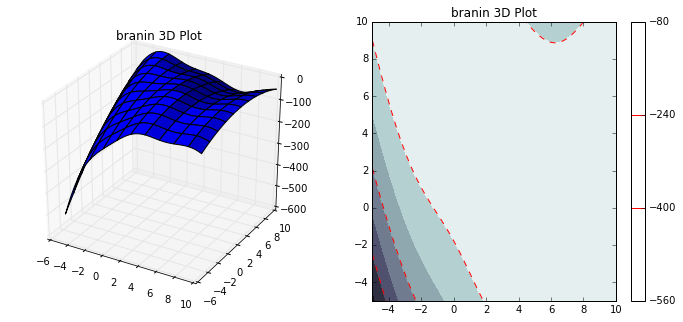

In [30]:
visualization.plot_original_function(myfunction)

In [31]:
# create an empty object for BO
bo=PradaBayOptBatch(f=myfunction.func, pbounds=myfunction.bounds, acq='ucb',opt='scipy')

# parameter for Gaussian Process
gp_params = {'theta':0.1*bo.dim,'noise_delta':0.1}

# init Bayesian Optimization
print "======================================================================="
print "Start Initialization"
bo.init(n_init_points=3*bo.dim)

Start Initialization
#Batch=6 f_max=-9.4119



Running Budgeted Batch Bayesian Optimization
#Batch=3 f_max=-2.628
Iter=1 Optimization Time=6.07 sec 

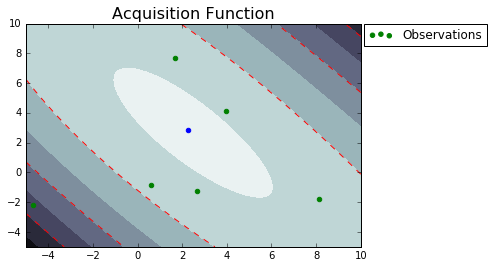

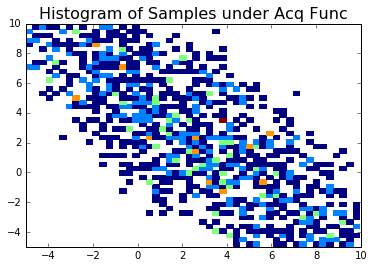

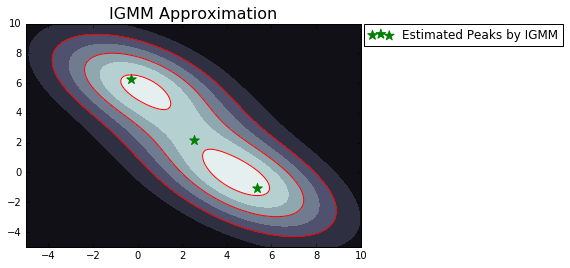

In [32]:
print "======================================================================="
print "\nRunning Budgeted Batch Bayesian Optimization"

# run first iteration (after initialization)
bo.maximize_batch_B3O(gp_params,kappa=2,IsPlot=1)
    
# we note that the optimization time printed out is recording for the main optimization steps only 
# Steps 4,5,6 in our Algorithm
sys.stdout.write("Iter=1 Optimization Time={:.2f} sec ".format(bo.opt_time[-1]))

#Batch=2 f_max=-2.628
Iter=2 Optimization Time=6.40 sec 

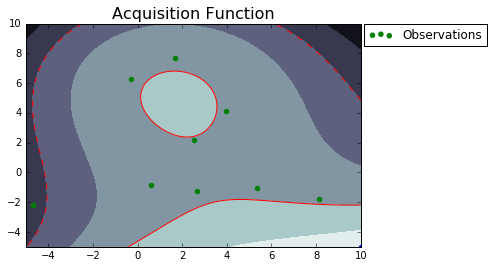

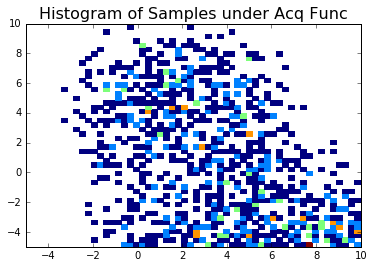

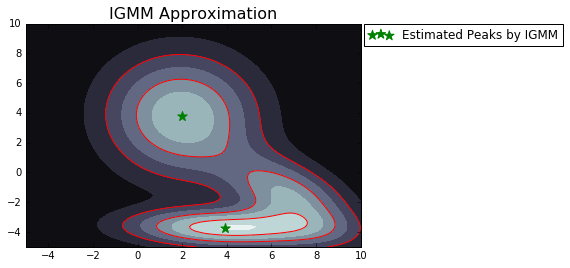

In [33]:
# run second iteration
bo.maximize_batch_B3O(gp_params,kappa=2,IsPlot=1)
    
# we note that the optimization time printed out is recording for the main optimization steps only 
# Steps 4,5,6 in our Algorithm
sys.stdout.write("Iter=2 Optimization Time={:.2f} sec ".format(bo.opt_time[-1]))

Run few more iterations

#Batch=2 f_max=-2.628
Iter=3 Optimization Time=6.40 sec
#Batch=2 f_max=-2.628
Iter=4 Optimization Time=6.81 sec
#Batch=2 f_max=-0.596
Iter=5 Optimization Time=7.18 sec
#Batch=1 f_max=-0.596
Iter=6 Optimization Time=6.70 sec
#Batch=1 f_max=-0.596
Iter=7 Optimization Time=6.67 sec
#Batch=3 f_max=-0.596
Iter=8 Optimization Time=6.84 sec
#Batch=2 f_max=-0.596
Iter=9 Optimization Time=6.98 sec
#Batch=1 f_max=-0.596
Iter=10 Optimization Time=6.98 sec


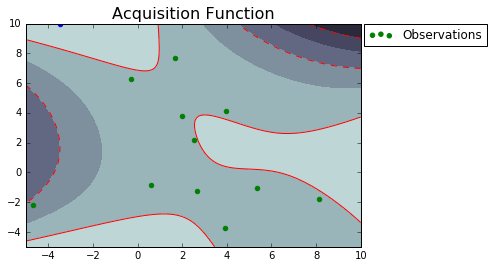

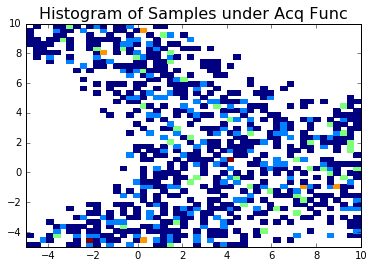

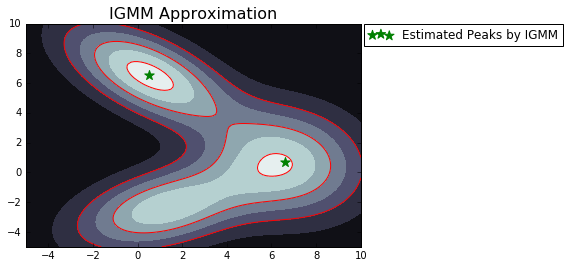

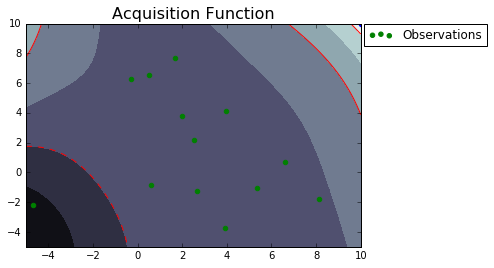

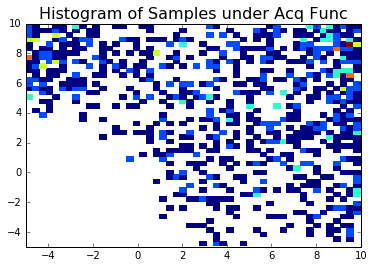

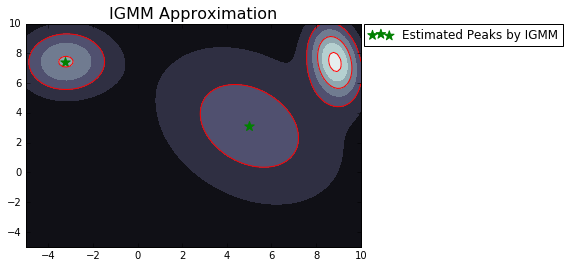

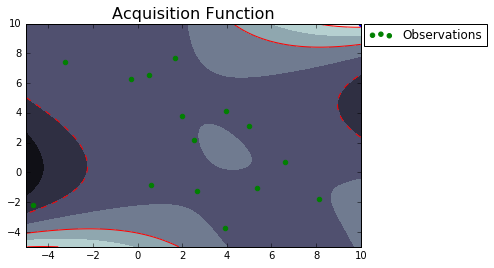

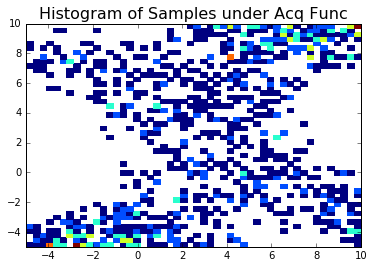

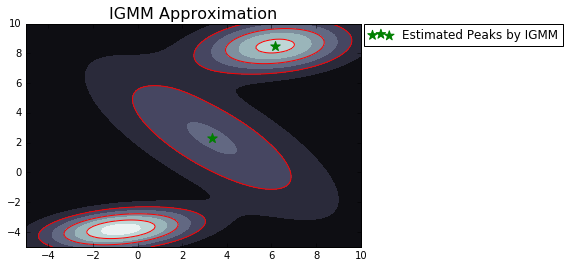

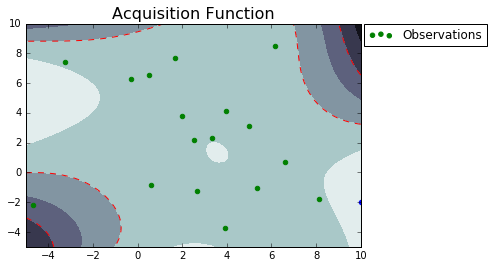

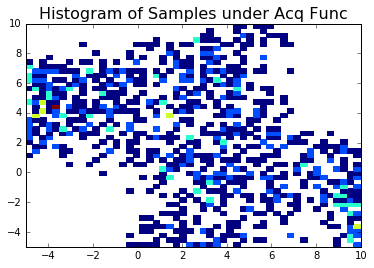

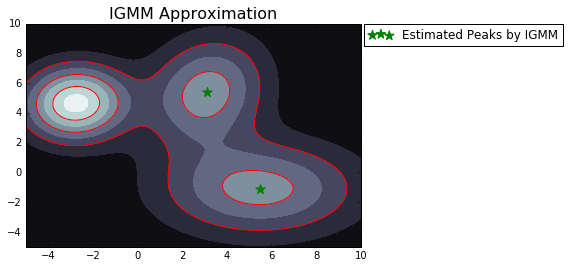

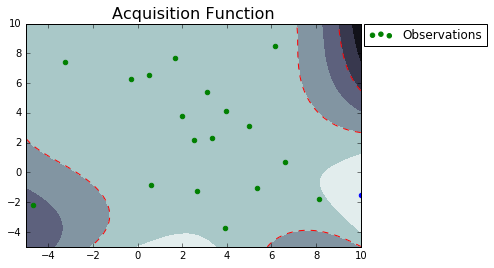

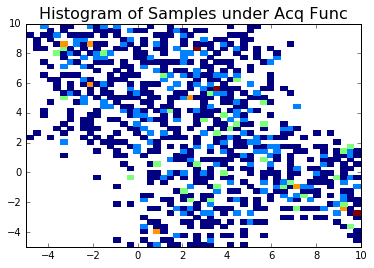

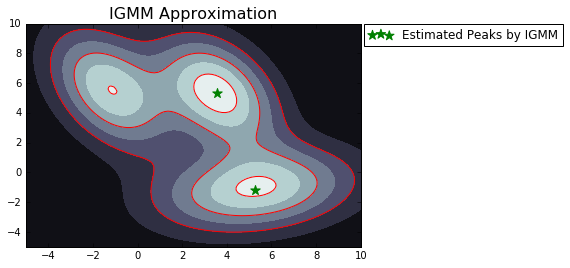

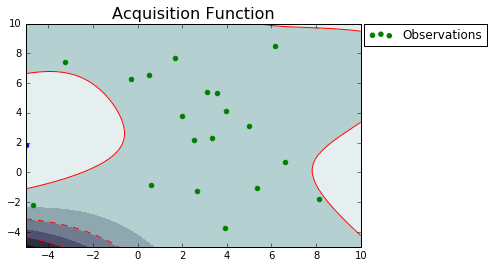

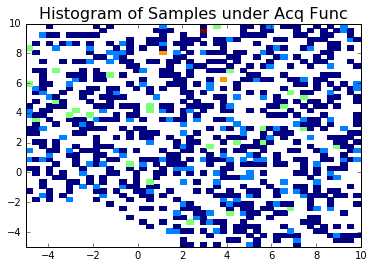

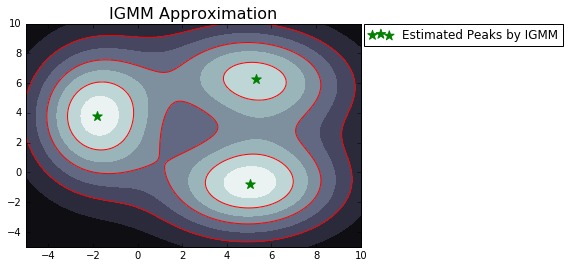

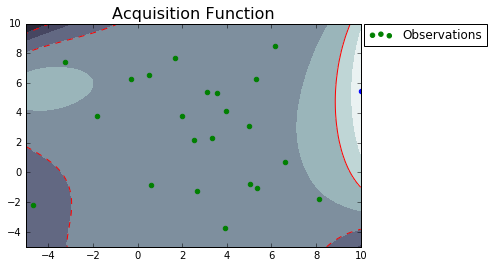

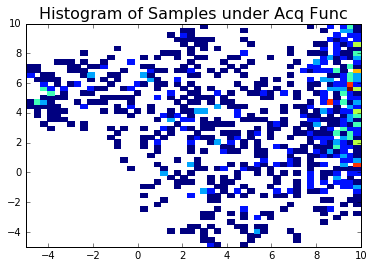

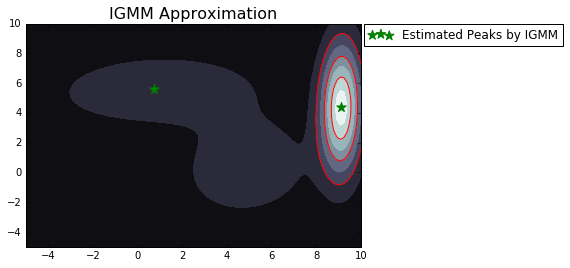

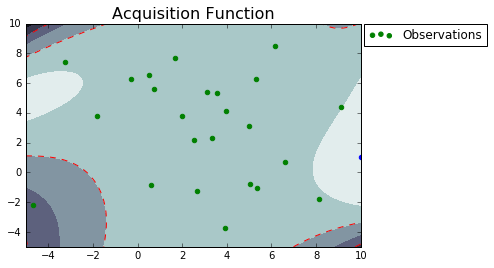

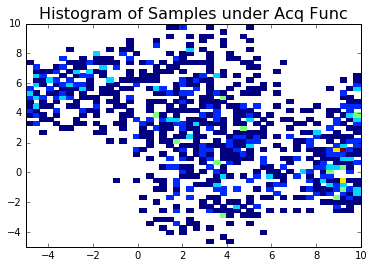

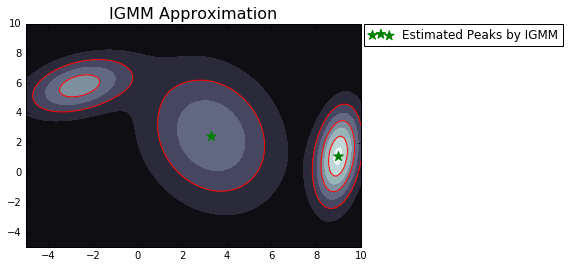

In [34]:
TT=3+4*myfunction.input_dim
for index in range(3,TT):
    bo.maximize_batch_B3O(gp_params,kappa=2,IsPlot=1)
    
    # we note that the optimization time printed out is recording for the main optimization steps only 
    # Steps 4,5,6 in our Algorithm
    sys.stdout.write("Iter={:d} Optimization Time={:.2f} sec\n".format(index,bo.opt_time[-1]))


In [35]:
print "======================================================================="
print "\nB3O #TotalPoints={:.0f} \tBest-found-value={:.3f}".format(np.sum(bo.NumPoints),bo.Y.max())
idxMax=np.argmax(bo.Y)
print "X_optimal "
print bo.X_original[idxMax]


B3O #TotalPoints=25 	Best-found-value=-0.596
X_optimal 
[ 3.33132062  2.29353365]


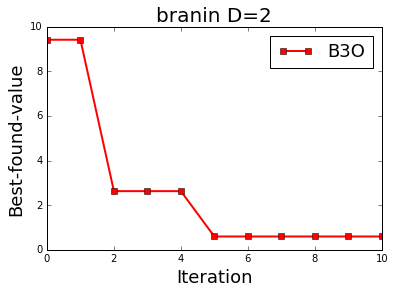

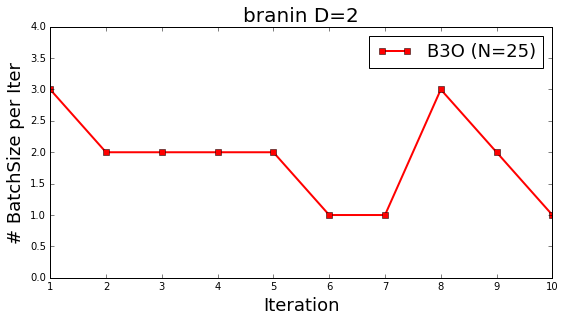

In [36]:
# plot the best-found-value
my_yBest=auxiliary_functions.yBest_Iteration(bo.Y,bo.NumPoints,IsPradaBO=1)


plt.plot(range(0,TT),my_yBest,linewidth=2,color='r',linestyle='-', marker='s',label='B3O')

plt.ylabel('Best-found-value',fontdict={'size':18})
plt.xlabel('Iteration',fontdict={'size':18})
plt.legend(loc=1,prop={'size':18})
#plt.ylim([np.min(my_yBest)*0.7,np.max(my_yBest)*1.2])
strTitle="{:s} D={:d}".format(myfunction.name,myfunction.input_dim)
plt.title(strTitle,fontdict={'size':20})

# plot the batch size per iteration
fig=plt.figure(figsize=(9, 4.5))
strNTotal="B3O (N={:.0f})".format(np.sum(bo.NumPoints))
plt.plot(range(1,TT),bo.NumPoints[1:],linewidth=2,color='r',linestyle='-',marker='s', label=strNTotal)
plt.ylabel('# BatchSize per Iter',fontdict={'size':18})
plt.xlabel('Iteration',fontdict={'size':18})
plt.legend(loc=1,prop={'size':18})
plt.ylim([np.min(bo.NumPoints[1:])-1,np.max(bo.NumPoints[1:])+1])
plt.title(strTitle,fontdict={'size':20})
